In [1]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
import csv
import time
from skmultiflow.drift_detection import PageHinkley


# Loading original dataset

In [2]:
dataset = pd.read_csv('dataset_moteid-01.csv')
dataset

,0,19.3024,1,126.25163435935974
0,1,19.1652,1,126.251634
1,2,19.1750,1,126.251634
2,3,19.1456,1,126.251634
3,4,19.1652,1,126.251634
4,5,19.1652,1,126.251634
...,...,...,...,...
3144,30,18.1558,0,9235.036163
3145,31,18.1656,0,9235.036163
3146,32,18.1558,0,9235.036163
3147,33,18.1656,0,9235.036163


# build ML dataset part 1

In [3]:
def preprocessing(dataset):
    MyLIst = []

    for i in np.arange((dataset.shape[0])):
        temperature = dataset.iloc[i, 1]
        label = dataset.iloc[i, 2]
        delay = dataset.iloc[i, 3]

        MyLIst.append([ temperature,label, delay ])
    cols = [ 'temperature','label' ,'delay' ]
    return pd.DataFrame(MyLIst, columns = cols)


# Registring ML in csv

In [5]:
df_ML

,temperature,label,delay
0,19.1652,1,126.251634
1,19.1750,1,126.251634
2,19.1456,1,126.251634
3,19.1652,1,126.251634
4,19.1652,1,126.251634
...,...,...,...
3144,18.1558,0,9235.036163
3145,18.1656,0,9235.036163
3146,18.1558,0,9235.036163
3147,18.1656,0,9235.036163


In [6]:
def saveFile(dataset, name='dataset'):
    f = open(name,'w')
    try:
        writer = csv.writer(f)
        writer.writerow(dataset.columns)
        for i in np.arange(int(dataset.shape[0])):
            writer.writerow(dataset.iloc[i,])
    finally:
        f.close()

In [7]:
saveFile(df_ML, name='sdn_ml.csv')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

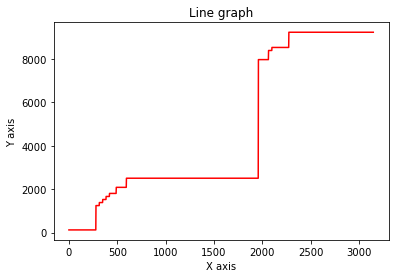

In [9]:
plt.title("Line graph")  

plt.xlabel("X axis")  

plt.ylabel("Y axis")  

plt.plot(np.arange(len(df_ML.delay)), df_ML.delay, color ="red")  

plt.show()